In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv("/home/anatol/course/machine-learning-ex1/ex1/ex1data2.txt",
                   names=['size','room','price'],header = None) 
x1 = data['size'].to_numpy(np.float32)
x2 = data['room'].to_numpy(np.float32)
y = data['price'].to_numpy(np.float32)

##normalization
## for size
mean = np.mean(x1)
std = np.std(x1)##otkloninie w srednem kazdogo chisla ot srednego 
x1 = (x1 - mean)/std 
myvalue0 = (1650 - mean)/std##dlapredskazania

## for number of bedrooms
mean = np.mean(x2)
std = np.std(x2)##otkloninie w srednem kazdogo chisla ot srednego 
x2 = (x2 - mean)/std 
myvalue1 = (3 - mean)/std

In [2]:
#making matrix X and defing theta
m = x1.shape[0]
x1 = x1.reshape(m,1)
x2 = x2.reshape(m,1)
X = np.hstack((np.ones((m,1)),x1,x2))
theta = np.zeros((3,1))
y = y.reshape(m,1)
alpha = [0.3, 0.1, 0.03, 0.01]
iterations = 50

In [3]:
def costfunction(X,y,theta):
    m = X.shape[0]
    J = 1/(2*m)*np.sum((X @ theta-y)**2)
    
    return J
costfunction(X,y,theta)

65591548106.45744

In [4]:
def grades(X,y,theta,alpha,iter,num_of_theta):
    theta = np.zeros((num_of_theta,1))
    m = X.shape[0]
    J_his = np.zeros((iter,1))
    theta_his = np.zeros((iter+1,num_of_theta))
    x_sum = np.sum(X[:,1])
    val = np.zeros((iter,num_of_theta))
    for i in range(iter):
        theta[:,0] = theta_his[i,:]
        J_his[i,0] = costfunction(X,y,theta)
        
        
        for j in range(num_of_theta):
            
            val[i,j] = theta[j,0] - alpha / (m) * (np.transpose(X @ theta-y) @ X[:,j])
            theta_his[i+1,j] = val[i,j]
       # theta[0,0] = val0  
        #theta[1,0] = val1
       # theta[2,0] = val2
      
    return J_his,theta_his

new = np.zeros((iterations,1))
for al in alpha:
    
    
    J_his, _ = grades(X,y,theta,al,iterations,3)
    new = np.hstack((new, J_his))
    
#new.reshape(50,5)
new[:, 1:]

array([[6.55915481e+10, 6.55915481e+10, 6.55915481e+10, 6.55915481e+10],
       [3.27178872e+10, 5.32682604e+10, 6.17511947e+10, 6.42977763e+10],
       [1.71259845e+10, 4.33890851e+10, 5.81487171e+10, 6.30310184e+10],
       [9.58680529e+09, 3.54574313e+10, 5.47689761e+10, 6.17906944e+10],
       [5.88706322e+09, 2.90805556e+10, 5.15978285e+10, 6.05762371e+10],
       [4.04693734e+09, 2.39470799e+10, 4.86220585e+10, 5.93870920e+10],
       [3.11821256e+09, 1.98095739e+10, 4.58293145e+10, 5.82227168e+10],
       [2.64089936e+09, 1.64710117e+10, 4.32080506e+10, 5.70825812e+10],
       [2.38973839e+09, 1.37742042e+10, 4.07474718e+10, 5.59661668e+10],
       [2.25350445e+09, 1.15935250e+10, 3.84374833e+10, 5.48729665e+10],
       [2.17678926e+09, 9.82841307e+09, 3.62686436e+10, 5.38024844e+10],
       [2.13168259e+09, 8.39825464e+09, 3.42321205e+10, 5.27542356e+10],
       [2.10391419e+09, 7.23834070e+09, 3.23196502e+10, 5.17277460e+10],
       [2.08603782e+09, 6.29666642e+09, 3.05234997e

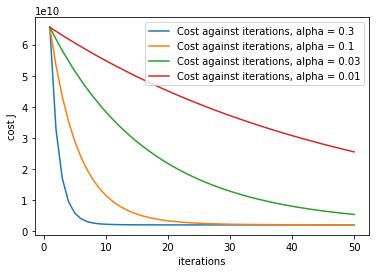

In [5]:
for i, el in enumerate(alpha):
    plt.plot(np.linspace(1,iterations,iterations),new[:,i +1],label="Cost against iterations, alpha = " + str(el))
    plt.xlabel('iterations')
    plt.ylabel('cost J')
    plt.legend()
plt.show()

In [6]:
_ , theta_his = grades(X,y,theta,0.1,iterations,3)

myvalue = [1 , myvalue0, myvalue1]
print(theta_his[iterations,:])
predicted_cost = myvalue @ theta_his[iterations,:].reshape(3,1)
predicted_cost

[338658.25646042 103322.82839356   -474.73971176]


array([292679.0722507])